# ROC Curves and AUC - Lab


## Introduction 

In this lab, we'll practice drawing ROC graphs, calculating AUC, and interpreting these results. In doing so, we will also further review logistic regression, by briefly fitting a model as in a standard data science pipeline.

## Objectives

You will be able to:

* Evaluate classification models using various metrics
* Define and understand ROC and AUC

## Training the Model

Start by repeating the previous modelling steps we have discussed. For this problem, you are given a dataset **mushrooms.csv**. You're first job is to train a LogisticRegression classifier on the dataset to determine whether the mushroom is **e**dible or **p**oisonous. The first column of the dataset *class* indicates whether or not the mushroom is poisonous or edible.

** For consistency use random_state=0**

In [24]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter('ignore')

In [25]:
mush = pd.read_csv('mushrooms.csv')
mush = pd.get_dummies(mush, drop_first=True)

y = mush.class_p
X = mush.iloc[:, 1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

logreg = LogisticRegression(fit_intercept=False, C=1e12)
log_model = logreg.fit(X_train, y_train)

yhat_test = log_model.predict(X_test)
yhat_train = log_model.predict(X_train)

print(log_model)

mush.head()

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)


,class_p,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


## ROC Metrics
  
Next, calculate the false positive rate and true positive rate (you can use the built in metrics from SciKit-Learn) of your classifier.

In [32]:
from sklearn.metrics import roc_curve, auc

y_score = log_model.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score)
print(f'AUC: {auc(fpr, tpr)}')

AUC: 1.0


## Drawing the ROC Graph

Next, use the false positive rate and true positive rate to plot the Receiver Operating Characteristic Curve for both the train and test sets.

Text(0.5, 1.0, 'ROC Curve - Test')

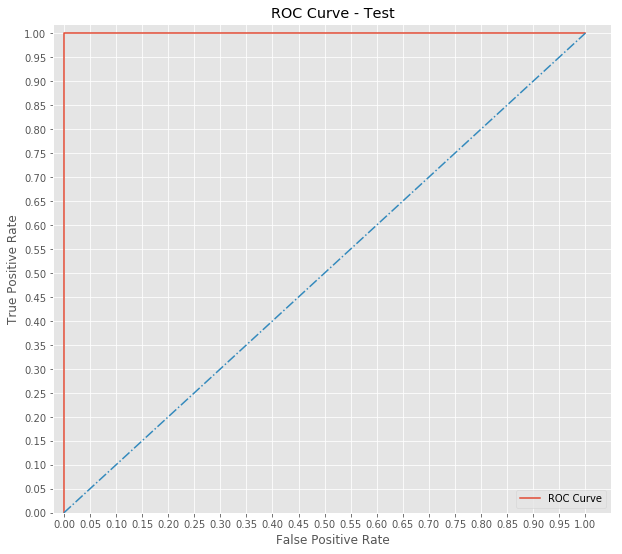

In [64]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

plt.figure(figsize=(10, 9))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='-.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xticks([i/20 for i in range(21)])
plt.yticks([i/20 for i in range(21)])
plt.xlim(-.02, 1.05)
plt.ylim(0, 1.02)
plt.legend()
plt.title('ROC Curve - Test')

Text(0.5, 1.0, 'ROC Curve - Train')

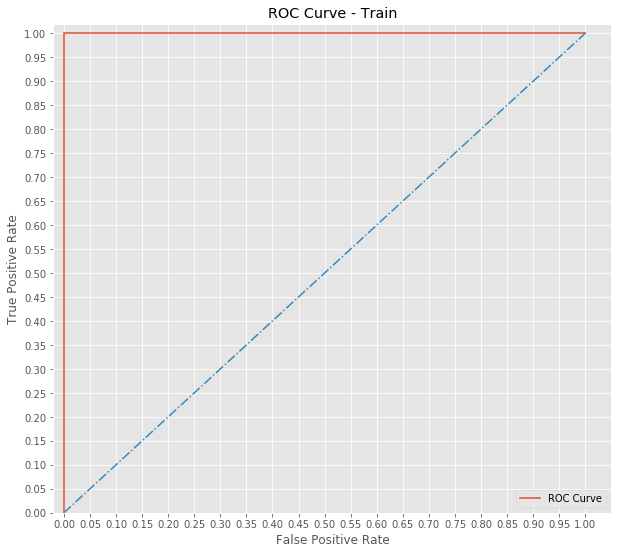

In [65]:
y_score = log_model.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score)

plt.figure(figsize=(10, 9))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='-.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xticks([i/20 for i in range(21)])
plt.yticks([i/20 for i in range(21)])
plt.xlim(-.02, 1.05)
plt.ylim(0, 1.02)
plt.legend()
plt.title('ROC Curve - Train')

## Interpretation:

The ROC curves perfectly predict if a mushroom is edible or not.

## Interpretation
Look at the ROC curve graph from the lesson:  

<img src="images/lesson_roc_graph.png">

Think about the scenario of this model: predicting heart disease. If you tune the current model to have and 82% True Positive Rate, (you've still missed 20% of those with heart disease), what is the False positive rate?

In [69]:
fpr = .18

## Interpretation 2
If you instead tune the model to have a 95.2% True Postive Rate, what will the False Postive Rate be?

In [70]:
fpr = .27

## Opinion
In the case of heart disease that we've been talking about, do you find any of the above cases acceptable? How would you tune the model. Describe what this would mean in terms of the number of patients falsely scared of having heart disease and the risk of missing the warning signs for those who do actually have heart disease.

## Your answer here
It would be better to inconvenience people by giving them a false scare than to miss the signs of heart disease. However, when 25%+ of patients without heart disease are diagnosed as such, this could inundate labs and make it more difficult to get results quickly enough to take appropriate action. Ultimately, the appropriate rate will have to be determined among those with more precise domain knowledge.

## Summary

In this lesson we further explored ROC curves and AUC, drawing graphs and then interpreting these results to lead to a more detailed and contextualized understanding of our model's accuracy.